In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
from librosa import display

In [2]:
data_path = "data"

In [3]:
SEED = 42

np.random.seed(SEED)

In [4]:
def get_digit_random_person(digit, target_sr=16_000):
    person = np.random.randint(0, 61)
    file_path = f"{data_path}\\{person:02}\\{digit}_{person:02}_0.wav"
    y, sr = librosa.load(file_path)
    y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    return y, target_sr

def get_waveform_audio(digit):
    y, sr = get_digit_random_person(digit)

    plt.figure(figsize=(10, 3))
    display.waveshow(y=y, sr=sr)
    plt.title(f"Digit: {digit}")
    plt.show()

    return Audio(data=y, rate=sr)

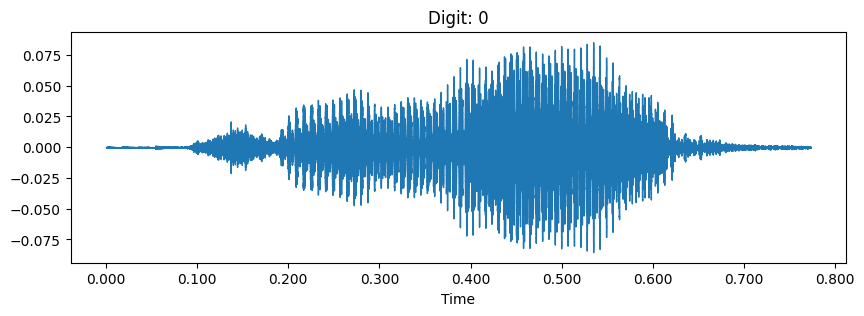

In [5]:
get_waveform_audio(0)

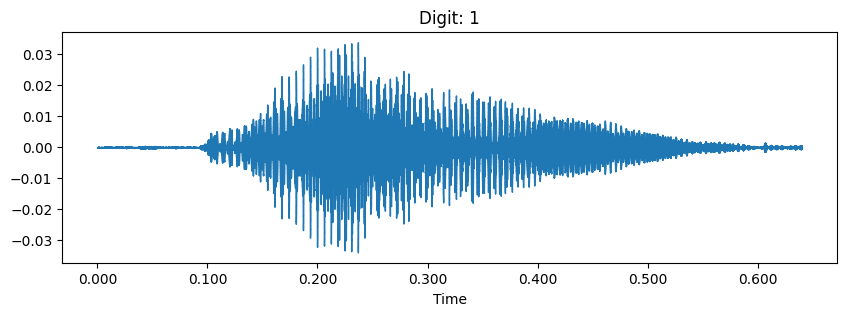

In [6]:
get_waveform_audio(1)

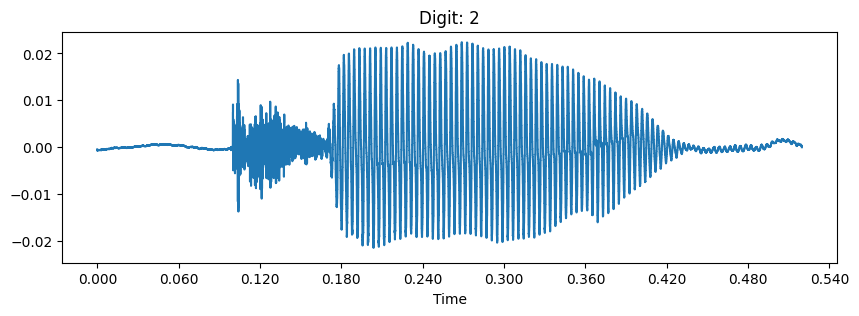

In [7]:
get_waveform_audio(2)

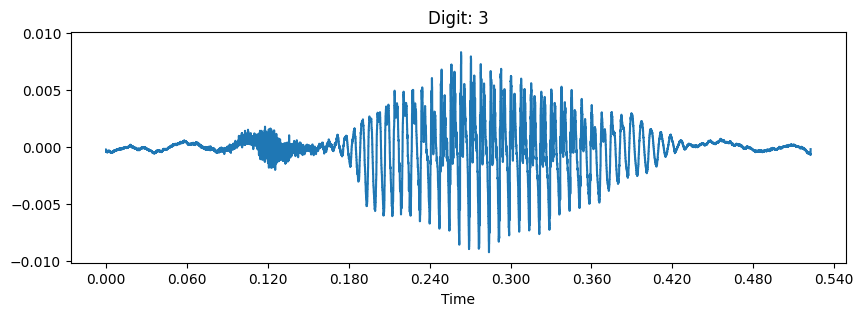

In [8]:
get_waveform_audio(3)

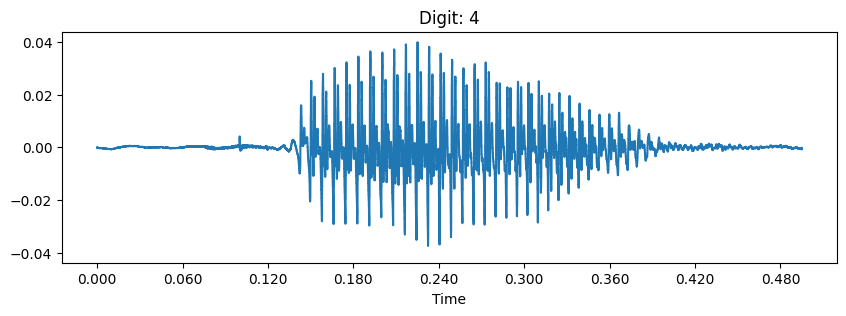

In [9]:
get_waveform_audio(4)

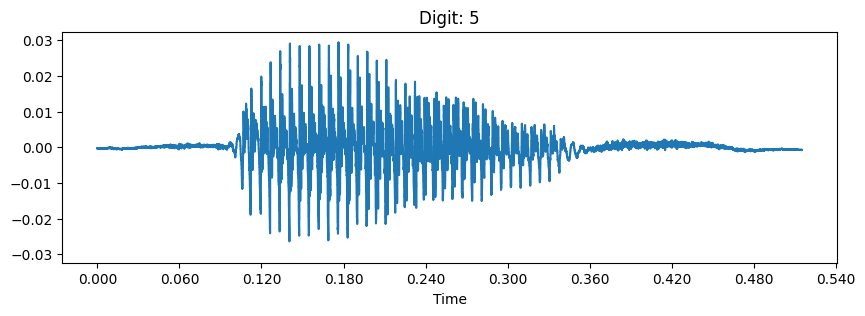

In [10]:
get_waveform_audio(5)

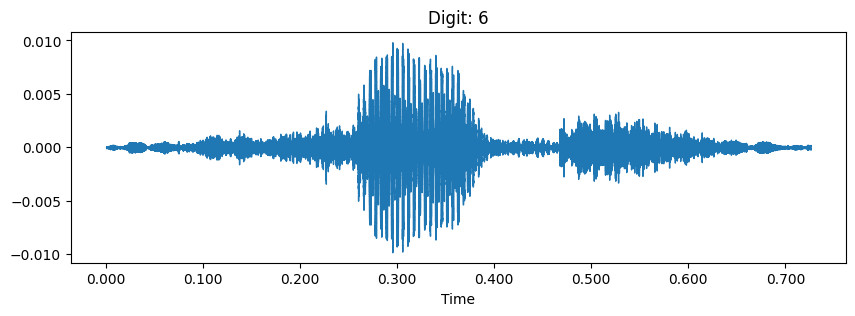

In [11]:
get_waveform_audio(6)

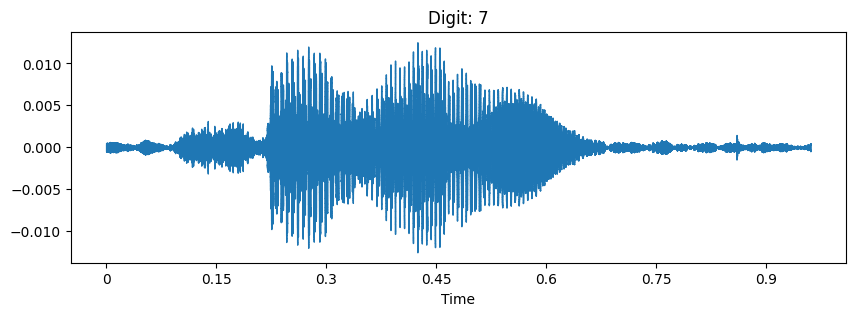

In [12]:
get_waveform_audio(7)

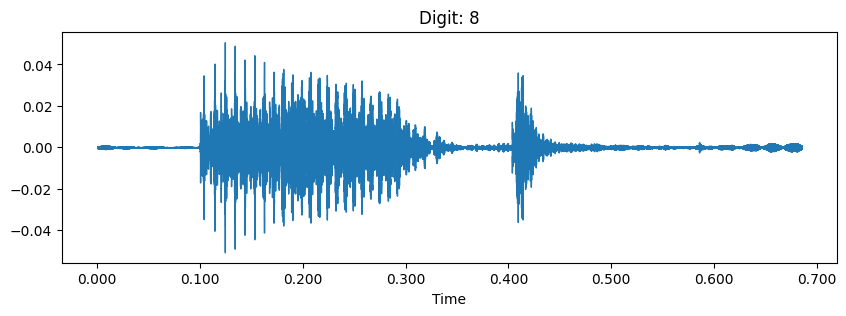

In [13]:
get_waveform_audio(8)

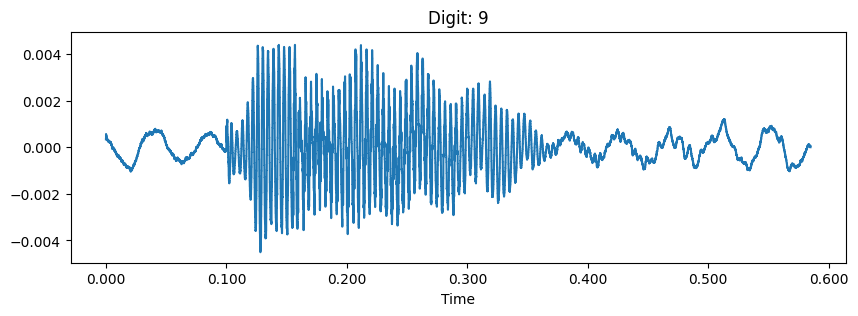

In [14]:
get_waveform_audio(9)

## Spectrogram

In [15]:
def get_spectrogram_audio(digit):
    y, sr = get_digit_random_person(digit)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    return S_db, sr

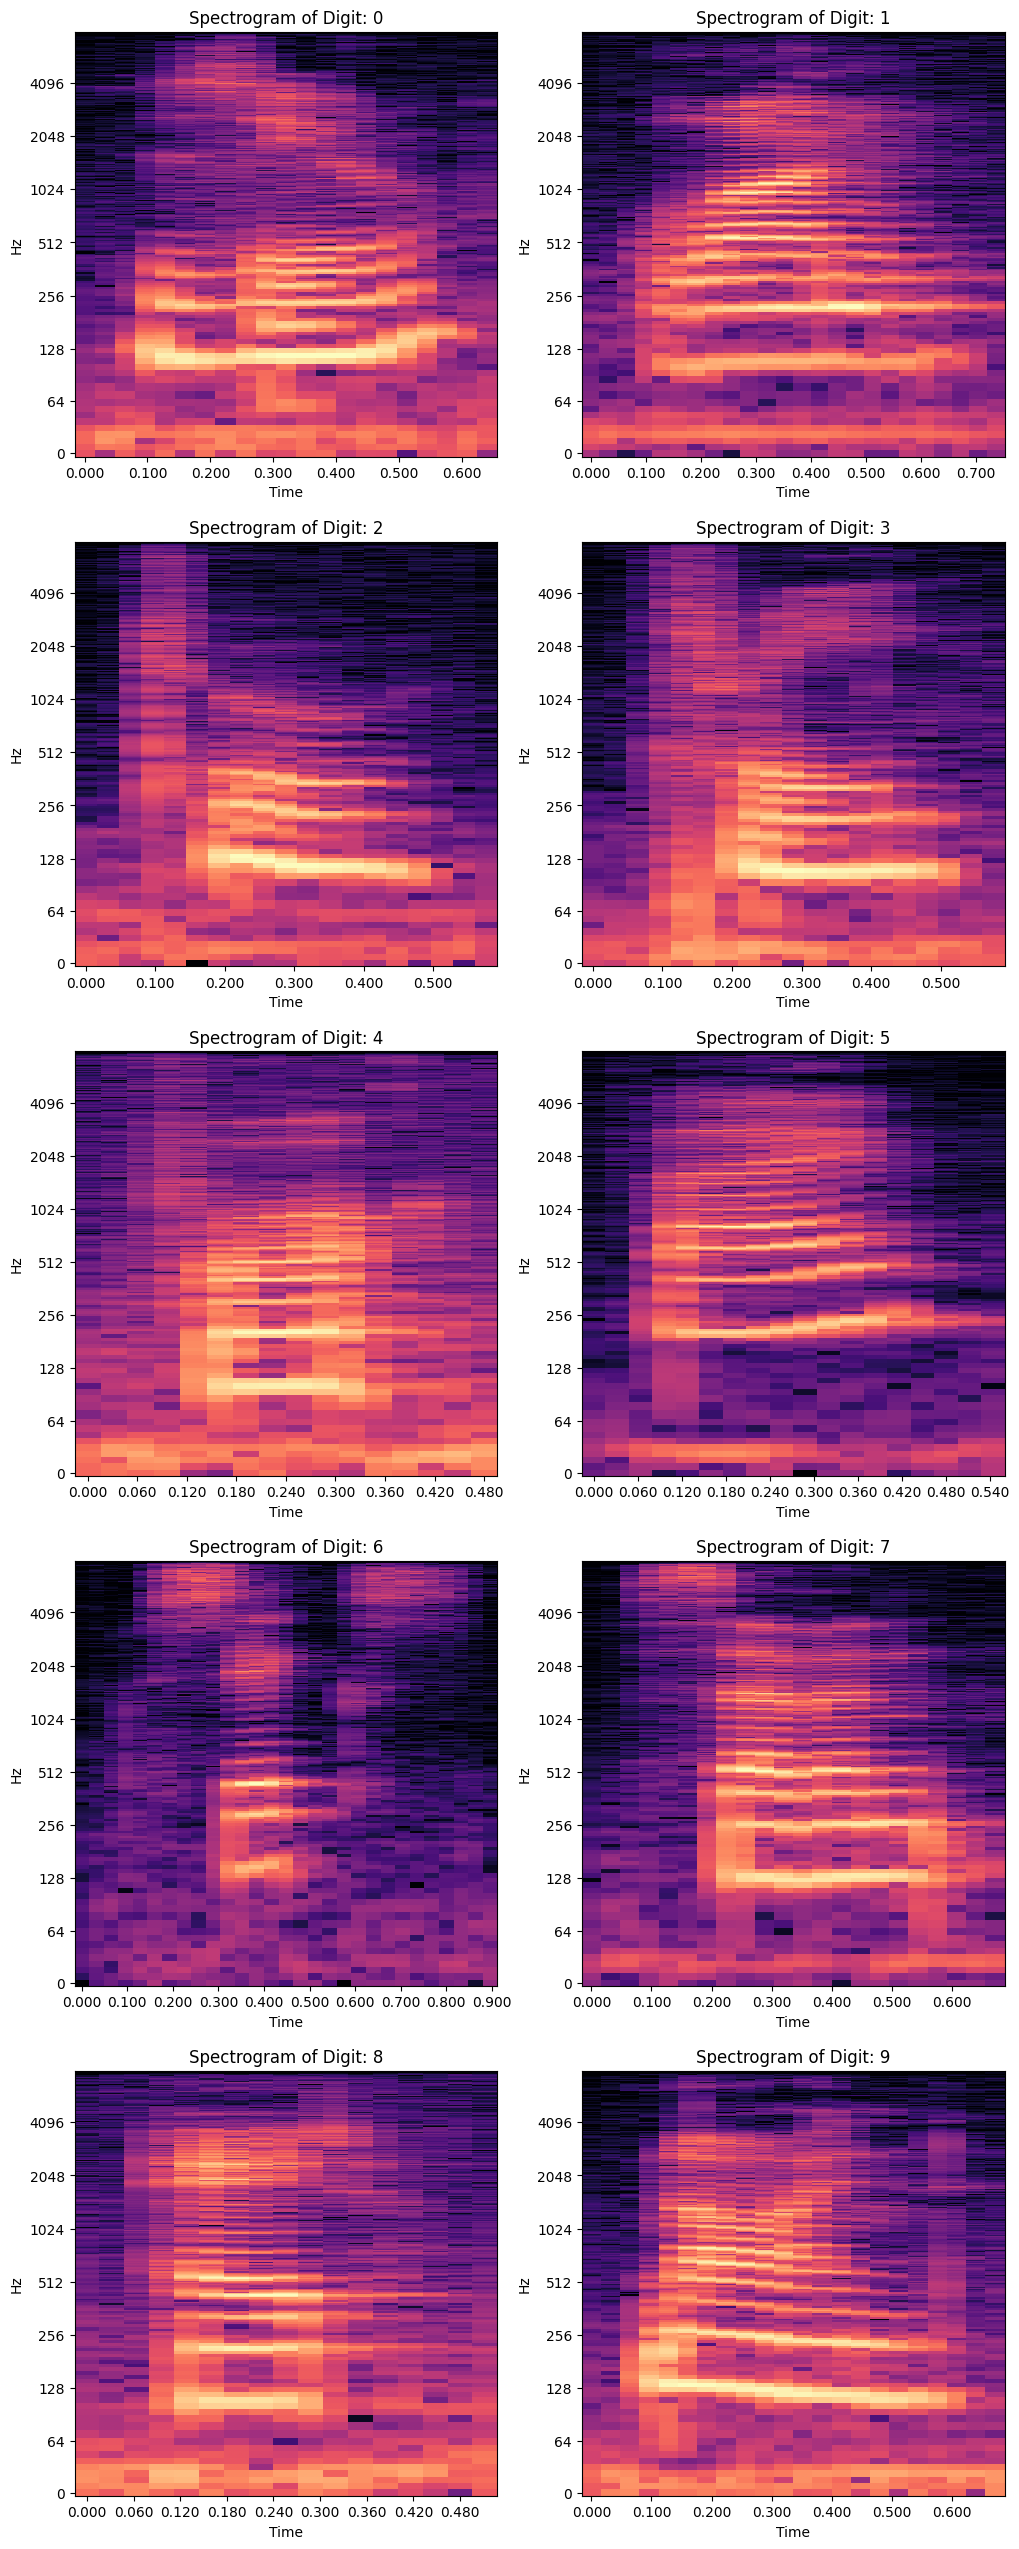

In [16]:
plt.figure(figsize=(12, 32))
for digit in range(10):
    S_db, sr = get_spectrogram_audio(digit)
    ax = plt.subplot(5, 2, digit + 1)
    display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram of Digit: {digit}")

## Mel-Spectrogram

In [17]:
def get_mel_spectrogram_audio(digit):
    y, sr = get_digit_random_person(digit)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db, sr

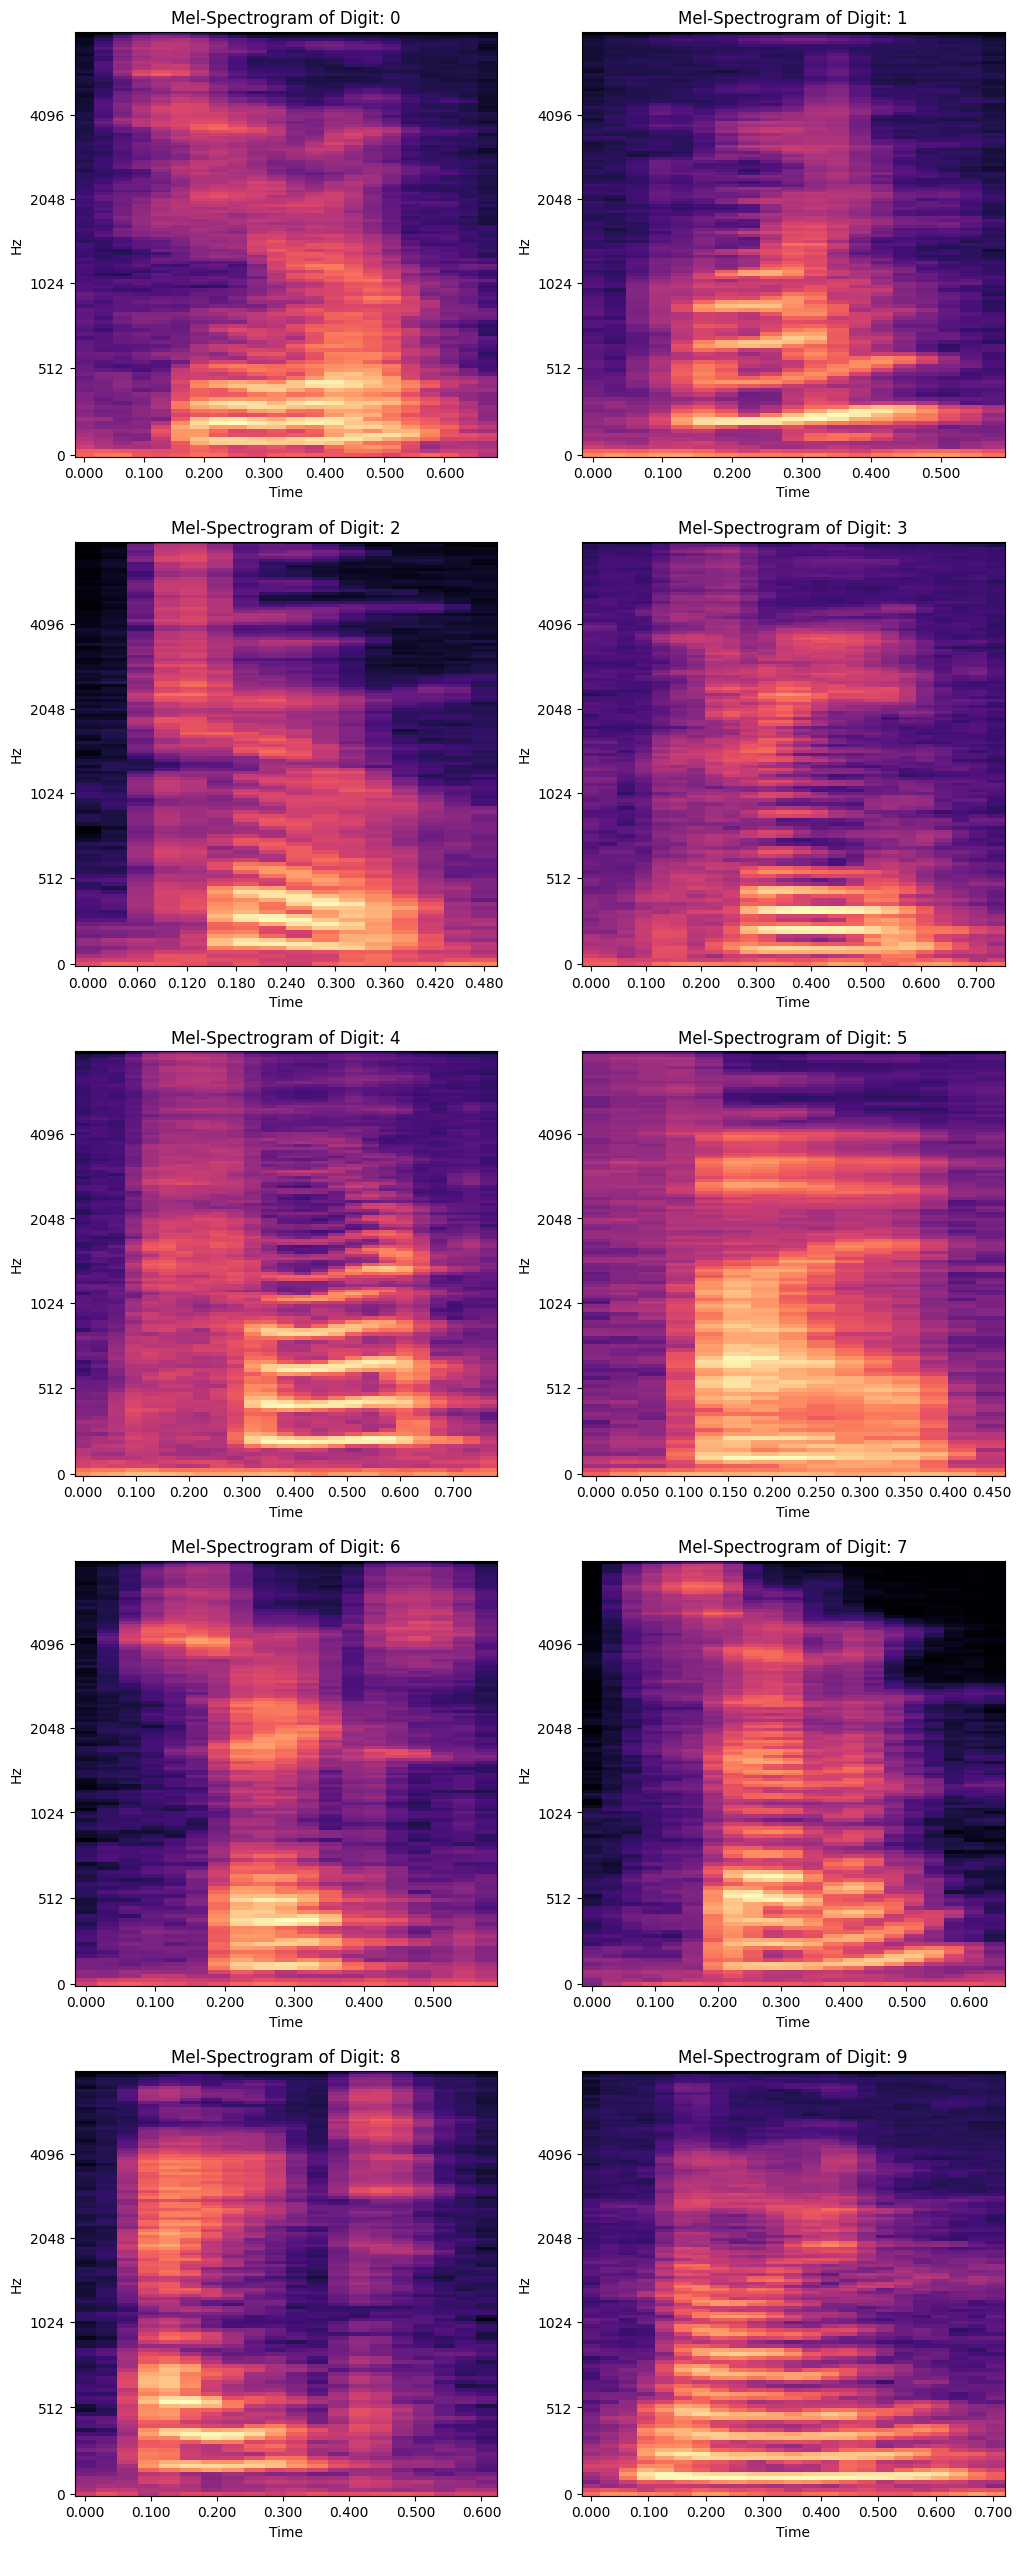

In [18]:
plt.figure(figsize=(12, 32))
for digit in range(10):
    S_db, sr = get_mel_spectrogram_audio(digit)
    ax = plt.subplot(5, 2, digit + 1)
    display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel-Spectrogram of Digit: {digit}")

## MFCCs

In [19]:
def get_mfcc_audio(digit):
    y, sr = get_digit_random_person(digit)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs, sr

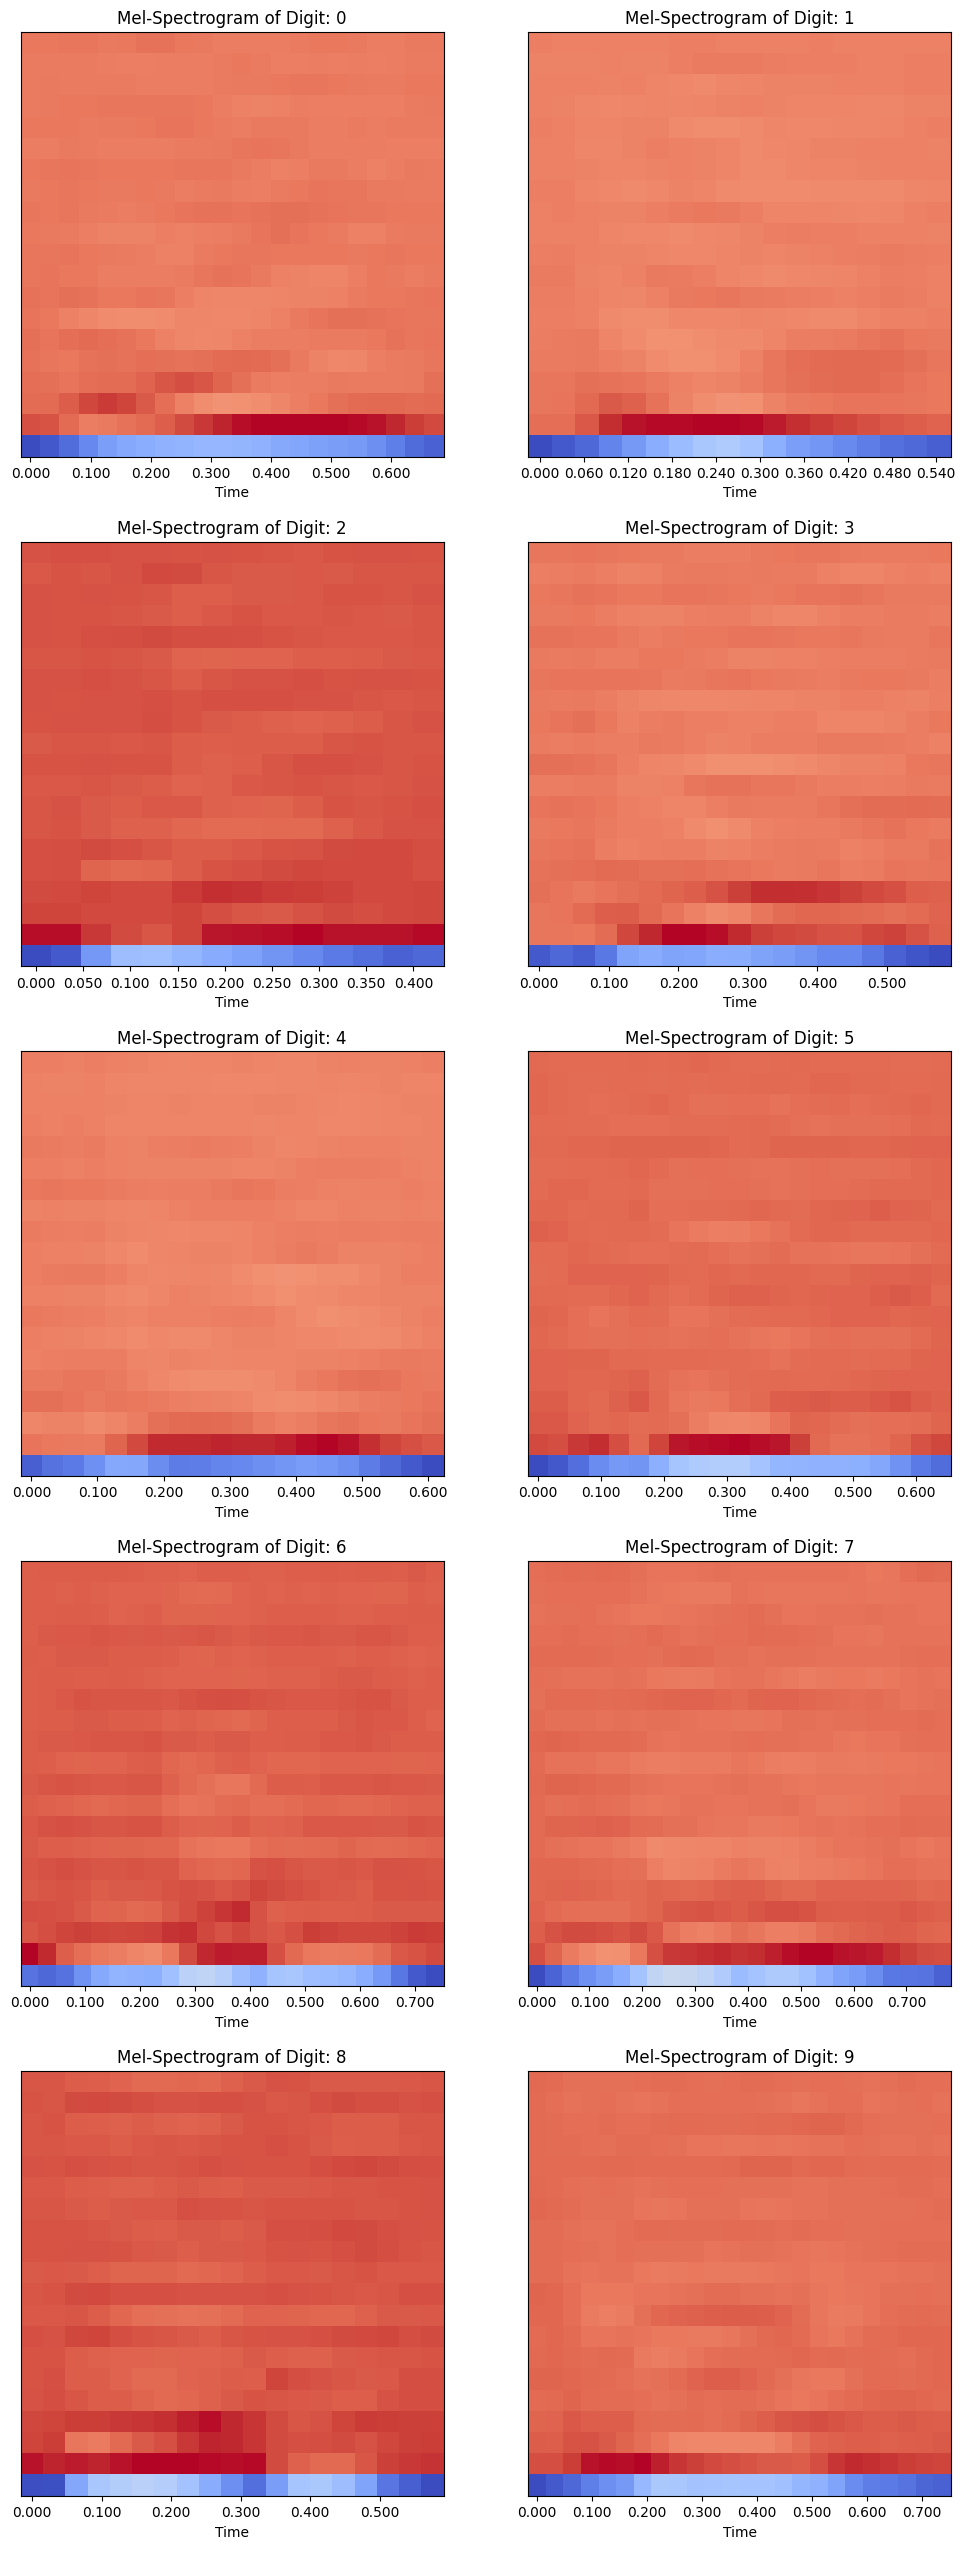

In [20]:
plt.figure(figsize=(12, 32))
for digit in range(10):
    S_db, sr = get_mfcc_audio(digit)
    ax = plt.subplot(5, 2, digit + 1)
    display.specshow(S_db, sr=sr, x_axis='time')
    plt.title(f"Mel-Spectrogram of Digit: {digit}")

### Max Audio Length

In [27]:
import torchaudio

from glob import glob

max_length = 0
min_length = 999
sample_rates = set()


for file_path in glob(f"{data_path}\\*\\*.wav"):
    waveform, sample_rate = torchaudio.load(file_path)
    max_length = max(max_length, waveform.shape[1])
    min_length = min(min_length, waveform.shape[1])
    sample_rates.add(sample_rate)

print(f'Maximum audio length in the dataset: {max_length}')
print(f'Minimum audio length in the dataset: {min_length}')
print(f'Sample rates in the dataset: {sample_rates}')

Maximum audio length in the dataset: 47998
Minimum audio length in the dataset: 999
Sample rates in the dataset: {48000}
